## 实验：绘制 256 Bins 直方图

### 实验概要

直方图是能更好地了解图像内容的强大工具。例如许多摄像机显示正在捕获的场景的实时直方图，以便调整摄像机采集的某些参数，以捕获有效的图像并检测图像的采集问题，例如：曝光时间，亮度或对比度。它可以帮助摄影师查看所捕获像素强度的分布。我们将学习如何绘制图像通道的直方图，以及如何使用一种称为直方图均衡的技术，来改善图像中阴暗对象的可见度。图像直方图是像素强度分布的图形表示，图像的像素强度范围是 `0`到 `255`。譬如，下图显示了 BGR 图像及其对应的三个通道的直方图：

![](./img/1.jfif)

上图显示了样本 BGR 图像的蓝色，绿色和红色强度分布。直方图是可视化图像中不同强度像素分布的最有效工具。您将学习如何使用 Matplotlib 和 OpenCV 库可视化二进制，灰度和彩色图像的直方图。 您还将学习如何均衡直方图以增强灰度和彩色图像的图像质量。

#### Matplotlib 复习

为了计算图像的直方图，我们将使用来自名为 Matplotlib 的 Python 库中的命令。 Matplotlib 是一个庞大的库，您需要从中绘制直方图的模块称为 pyplot。 pyplot 模块使您可以访问 Matplotlib 的绘图功能。此绘图功能是我们显示直方图所需的功能。导入该模块所需的代码如下：

```python
import matplotlib.pyplot as plt
```

另外，您也可以按以下方式导入 pyplot 模块：

```python
from matplotlib import pyplot as plt
```

尽管在前面的实验中已经应用了很多次，我们在这里复习一下导入 `pyplot` 模块的语法说明：

<img src="./img/2.jfif" width="80%">

#### 用 Matplotlib 显示图像

使用 Matplotlib，您还可以在控制台本身上显示图像，这与 `cv2.imshow` 不同，后者会打开一个新窗口以显示图像。

要使用 Matplotlib 绘制 `img` 的灰度图像，可以使用以下代码：

```python
imgplot = plt.imshow(img , cmap="gray")
plt.title('Original image')
plt.show()
```
##### BGR->RGB
绘制彩色图像时，Matplotlib 假定您将始终为其提供 `RGB` 图像。然而，Python 的 OpenCV 读取 `BGR` 格式的图像。因此，要使用 Matplotlib，您将始终需要先将图像转换为 `RGB`。要将 `BGR` 图像转换为 `RGB`，请使用以下命令：

```python
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
```
##### LAB->RGB
同样，要将 `LAB` 图片转换为 `RGB`，请使用以下命令：

```python
rgb = cv2.cvtColor(img,cv2.COLOR_LAB2RGB)
```
在模仿人眼方面，`LAB` 颜色空间比 `RGB` 颜色空间更准确。它使用三个值（`L`,`A` 和 `B`）来指定颜色。该色彩空间最显着的特征是其与设备无关，这使得在不同的介质上更容易获得完全相同的色彩。在 LAB 中 ——

- L 通道（平面0）具有有关亮度的信息。 
- A 通道（平面1）的范围从绿色到红色。
- B 通道（平面2）的范围从蓝色到黄色。 

因此，`A` 和 `B` 通道一起定义了色彩空间的色度。要保持色度不变，我们将不会对 `A` 和 `B` 平面进行任何修改；我们只会使 `L` 平面进行调整。

##### HSV->RGB
要将 `HSV` 图像转换为 `RGB`，请使用以下命令：
```python
rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
```
以上，`img` 是输入图像，而 `rgb` 是该图像的 `RGB` 格式版本。要显示 `RGB`图像，请执行以下操作：
```python
plt.imshow(rgb)
plt.title('Converted RGB Image')
plt.show()
```

#### 用 Matplotlib 绘制直方图

让我们来看看计算直方图的命令。在 Matplotlib 中，只需一行代码就可以计算一个直方图并绘制它。命令如下:

`plt.hist(img_vec, bins = 256, color, alpha)`

让我们看看不同的参数：

- **`img_vec`：** 这是包含图像排列内像素的向量。如果 `img` 是您的2D图像，则 `img.ravel()` 命令将为您提供包含所有排列的图像像素的向量。
- **`color`：** 这是你想要绘制直方图的颜色。默认为 `海军蓝`。您可以将其指定为红色、蓝色、绿色、黄色、品红或任何其他标准颜色。
- **`bins`：** 这是我们想要在 X 轴上显示的直方条数。我们知道像素强度的范围在 `0` 到 `255` 之间，如果我们想单独可视化每个可能强度的像素计数，我们需要一个图形，将 `0-255` 区间显示为 `256` 个单独的直方条。因此，我们将保持 `bins=256`。如果你不指定 bins, Python 将默认将其视为 `10`。
- **`alpha`：** 这是你想要绘制直方图的透明度级别。

此命令唯一必需的输入是 `img_vec`。其余部分是可选的，因为它们规定了美学品质而不是图形的内容。如果用户不提供值，则采用默认值。如果要进行可视化处理，还有更多可选的输入内容。详细可以[参考官方文档](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)。

### 实验目标

在本实验中，我们将读取并绘制灰度图像，然后绘制具有 `256 bin` 的 2D 直方图。

### 1. 导入依赖库

In [1]:
import cv2                        # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 读取灰度图像

在这里我们使用了 `cv2.imread` 函数的 `cv2.IMREAD_GRAYSCALE` 选项，要求 OpenCV 使用灰度模式读取原图像。 

`cv2.imread` 函数的完整语法是：

`cv2.imread(path, flag)`

其中 `path` 是读取图像的路径。而 `flag` 是指定 OpenCV 读取图像的方式，有三个选项，包括：

- **`cv2.IMREAD_COLOR`：** 它指定加载彩色图像。图像的任何透明度都将被忽略。这是默认标志。另外，我们可以为此标志传递整数值 `1`。
- **`cv2.IMREAD_GRAYSCALE`：** 它指定以灰度模式加载图像。另外，我们可以为此标志传递整数值 `0`。
- **`cv2.IMREAD_UNCHANGED`：** 它指定加载图像，包括 alpha 通道。另外，我们可以为此标志传递整数值 `-1`。

In [12]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
# 指定以灰度模式加载图像
img= cv2.imread('./data/river_scene.jpg', cv2.IMREAD_GRAYSCALE) 

### 3. 显示图像

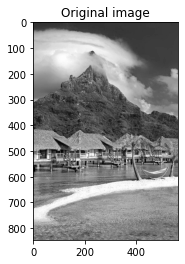

In [14]:
# cv2.imshow('grayscale image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img,cmap="gray") # 使用matplotlib将图像喷绘成灰色
plt.title('Original image')  # 指定输出图像的标题
plt.show()                   # 显示图像

### 4. 绘制直方图

图像直方图的X轴的范围为 `0-255`，Y 轴针对每种强度跟踪像素数。该图如下所示：

[ 48  48  48 ... 146 125 110]


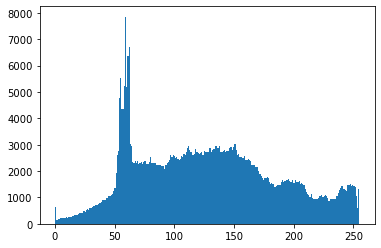

In [18]:
print(img.ravel()) # 拉直成为一维
ax = plt.hist(img.ravel(), bins = 256) # 指定bins为256
plt.show()                             # 显示图像

从该直方图中，我们可以看到图像中每个像素强度值（从0到255）发生了多少次。这为我们提供了该图像的像素分布的直观洞察。例如：我们知道 `0` 是黑色（最暗的区域），而 `255` 是白色（最亮的区域），在这里我们可以看到白色像素的数量大于黑暗像素的数量，这可以从源图像中进行确认。

### 实验小结

在本实验中，我们学习了如何绘制具有 256 个 bin 的示例灰度图像的直方图。